# External modules

In [28]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [29]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

In [30]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [31]:
n <- 10000

x <- rnorm(n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs          unique'
           10'000           10'000                0             = n
                            100.0%             0.0%                
                                                                   
              .05              .10              .25          median
  -1.655055230371  -1.273169625425  -0.648947349943  0.009283510226
                                                                   
            range               sd            vcoef             mad
   7.914932383892   0.995253258349  82.645442054603  0.987394583911
                                                                   
              0s            mean           meanCI
               0  0.012042445822  -0.007466521125
            0.0%                   0.031551412768
                                                 
             .75          

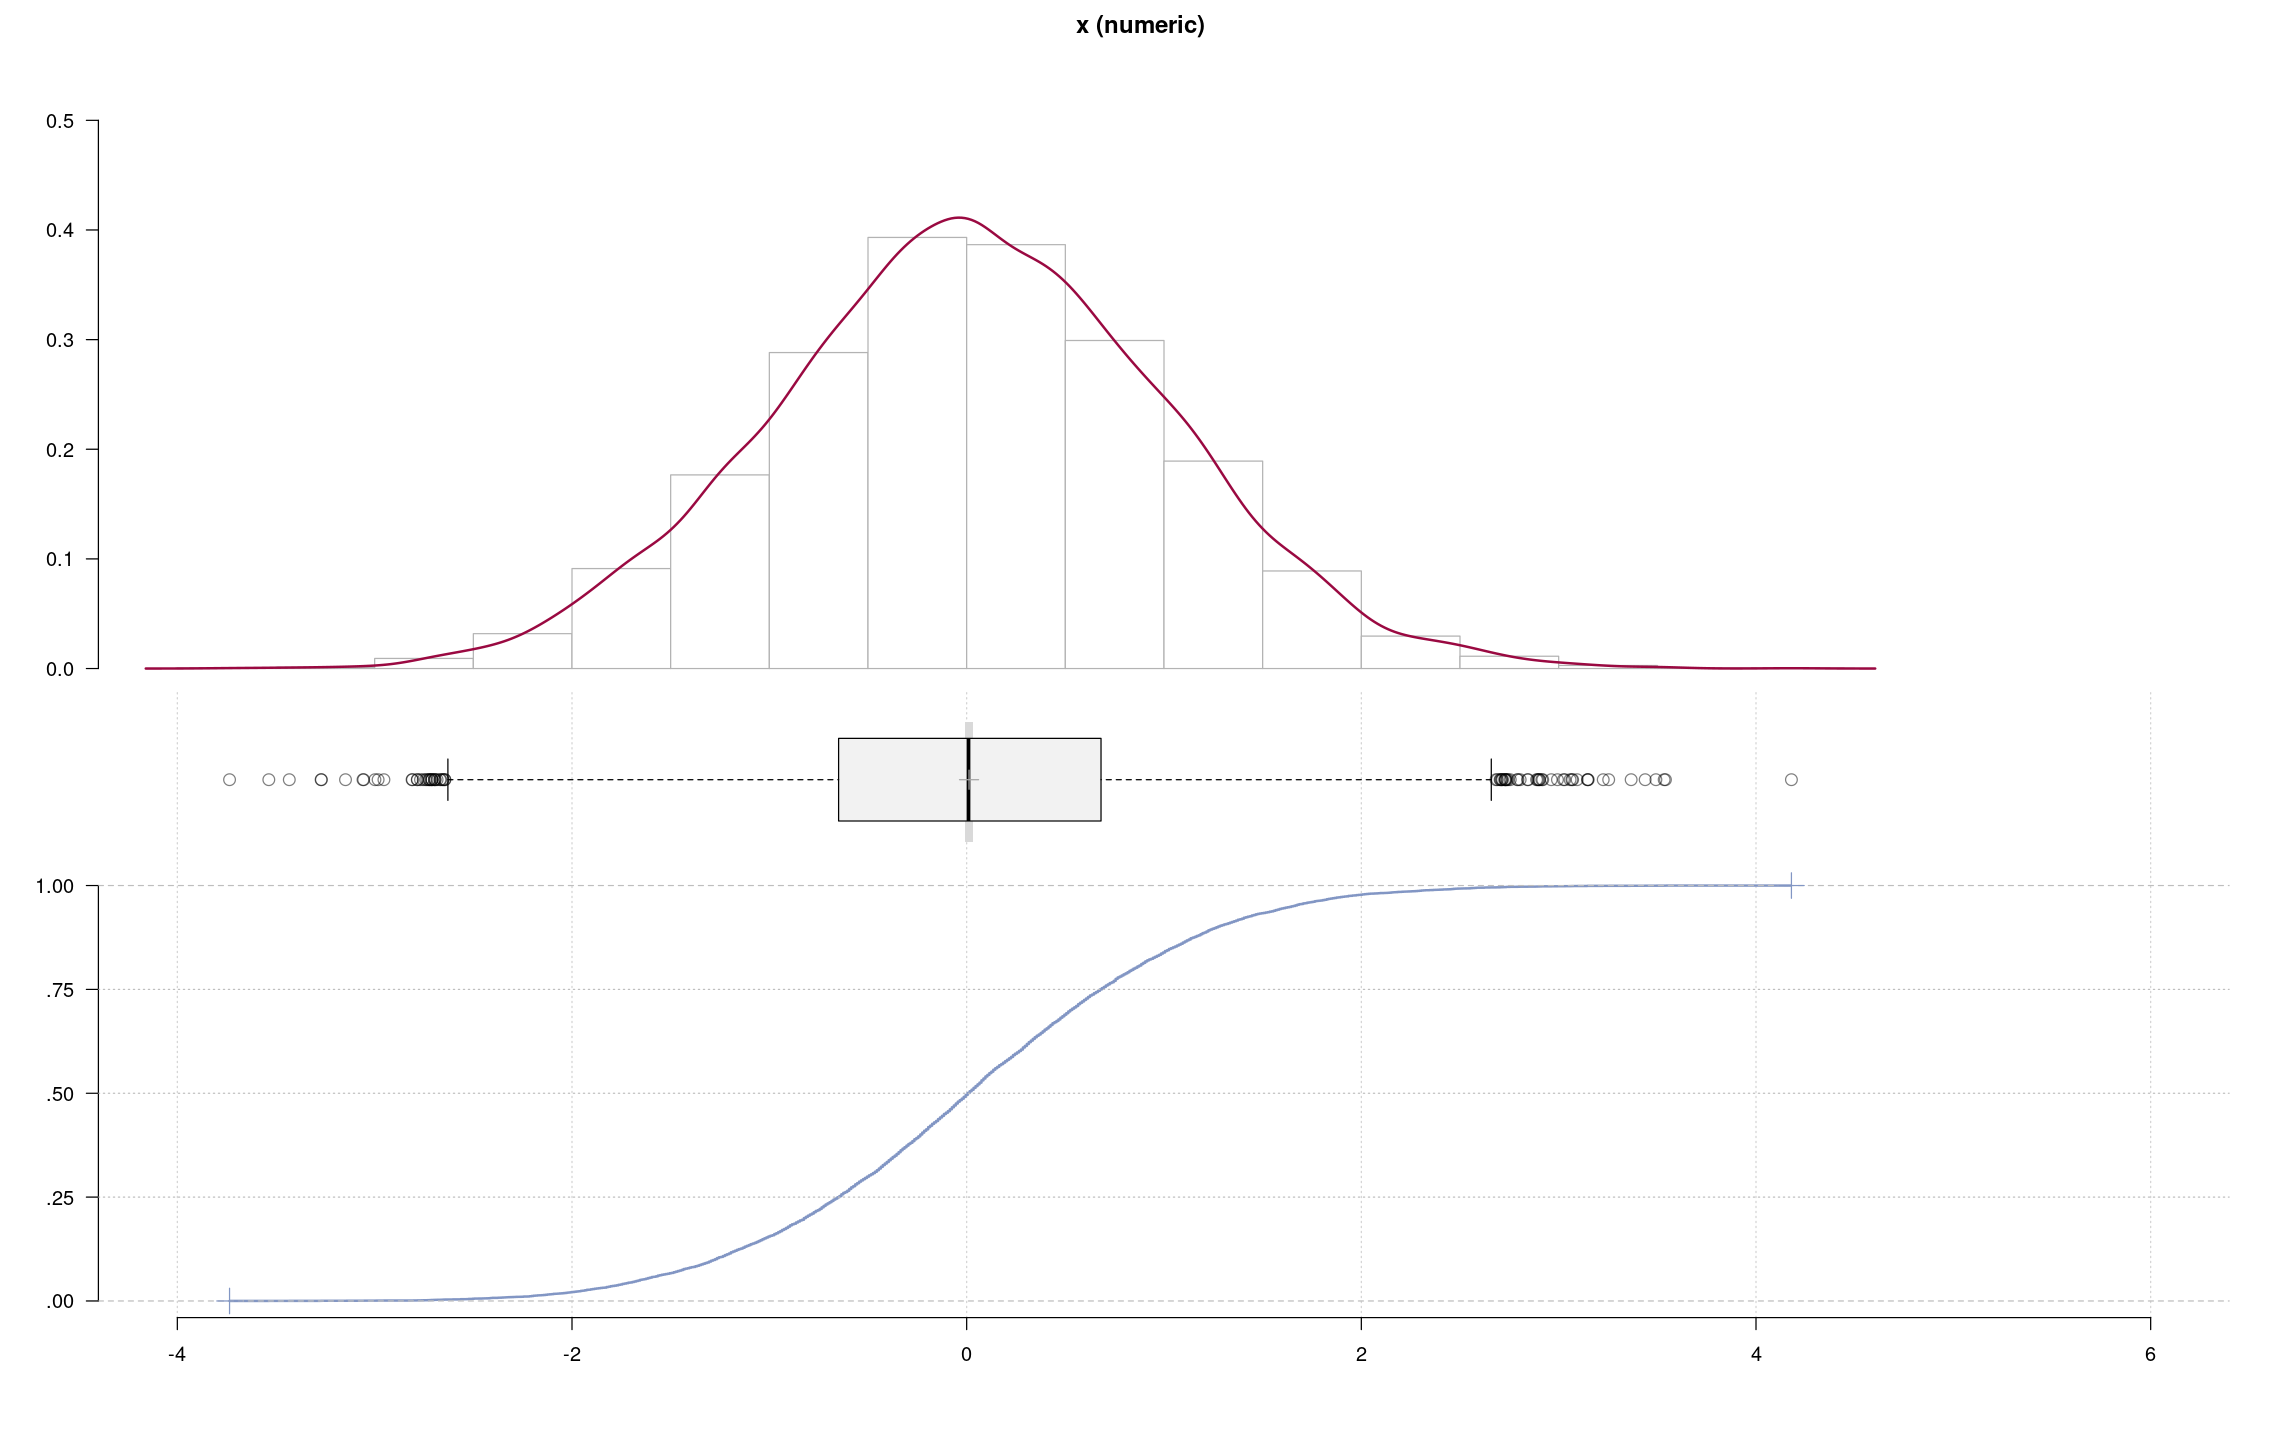

In [32]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [33]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# Estimation

In [34]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [35]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [36]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

          loc_star   scale_star     shape_star
42   0.29376784782 0.4957763819 -0.05175777753
135 -1.11989673915 1.1209662300 -0.18909061043
182  0.66208414753 0.4209938940 -0.04693397445
185 -1.76963632071 1.3823118654 -0.21414915543
186  0.04627030507 0.6500969551 -0.11148598767
192 -2.11554307644 1.5037860287 -0.22068748446
200  0.38223976861 0.4706904046 -0.04900737842


In [37]:
print(gev_mixture_model_object$weights)

             42             135             182             185             186 
0.0002668801708 0.0026688017080 0.8382706164932 0.0010675206832 0.0032025620496 
            192             200 
0.0005337603416 0.1539898585535 


In [38]:
print(which.max(gev_mixture_model_object$weights))

182 
  3 


In [39]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 3


In [40]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [41]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
760.5685830 955.2477731 


In [42]:
print(gev_mixture_model_object$threshold)

[1] 0.3241708102


# Diagnostic

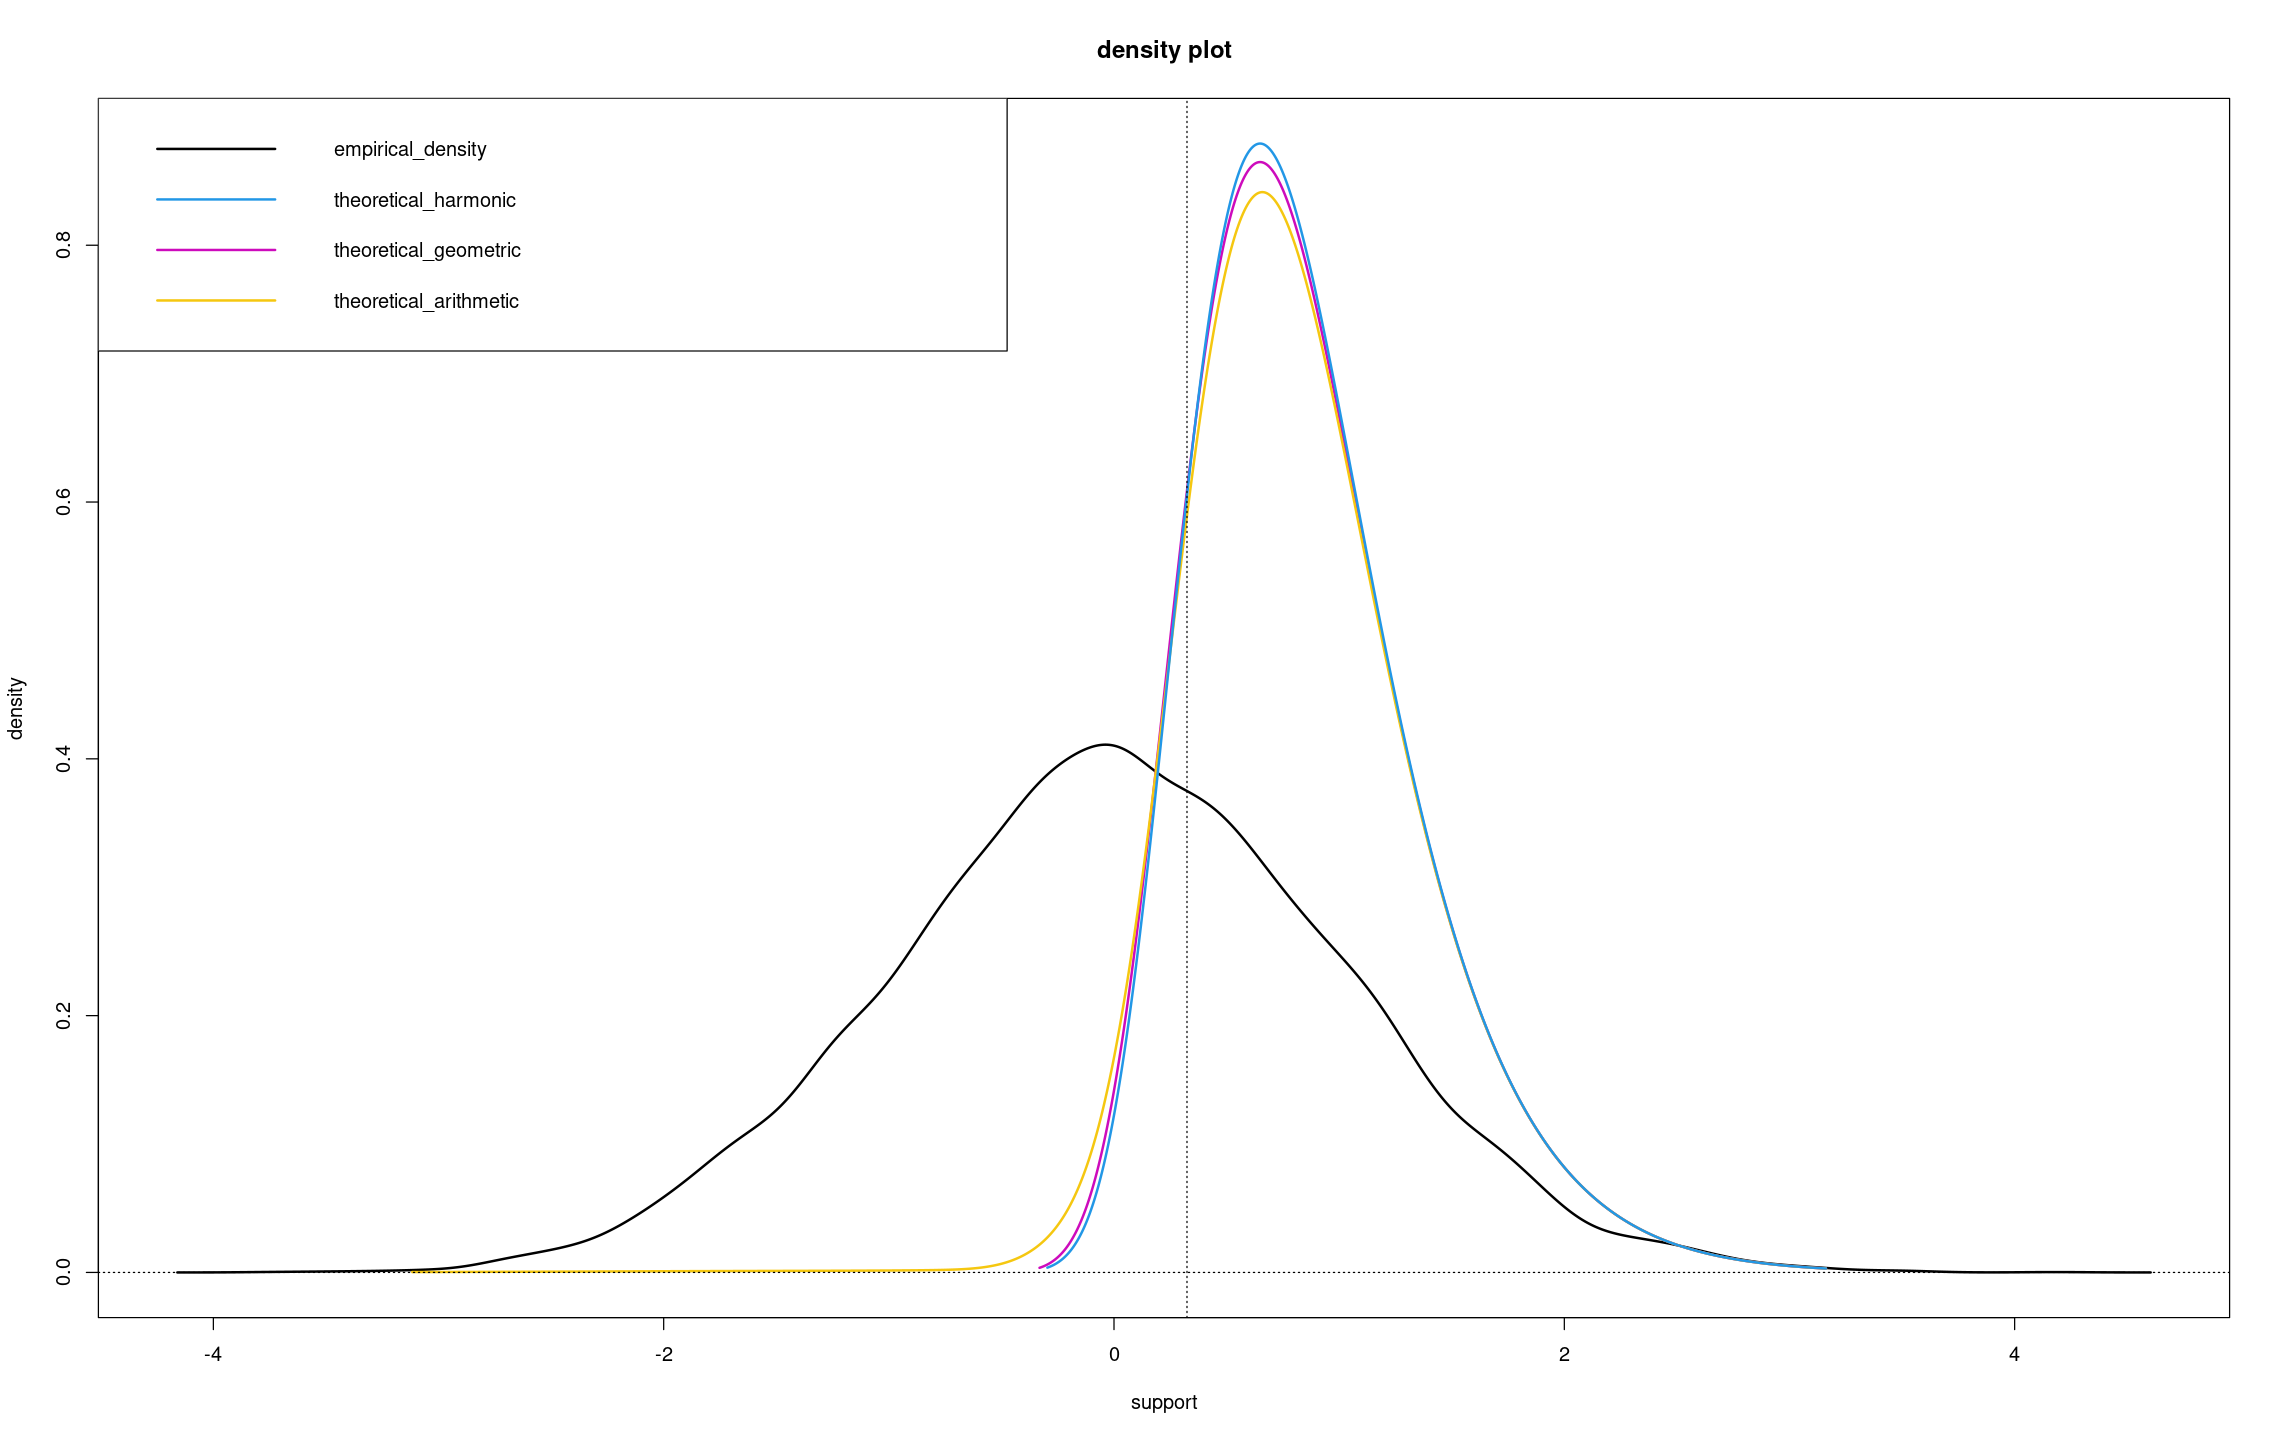

In [43]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

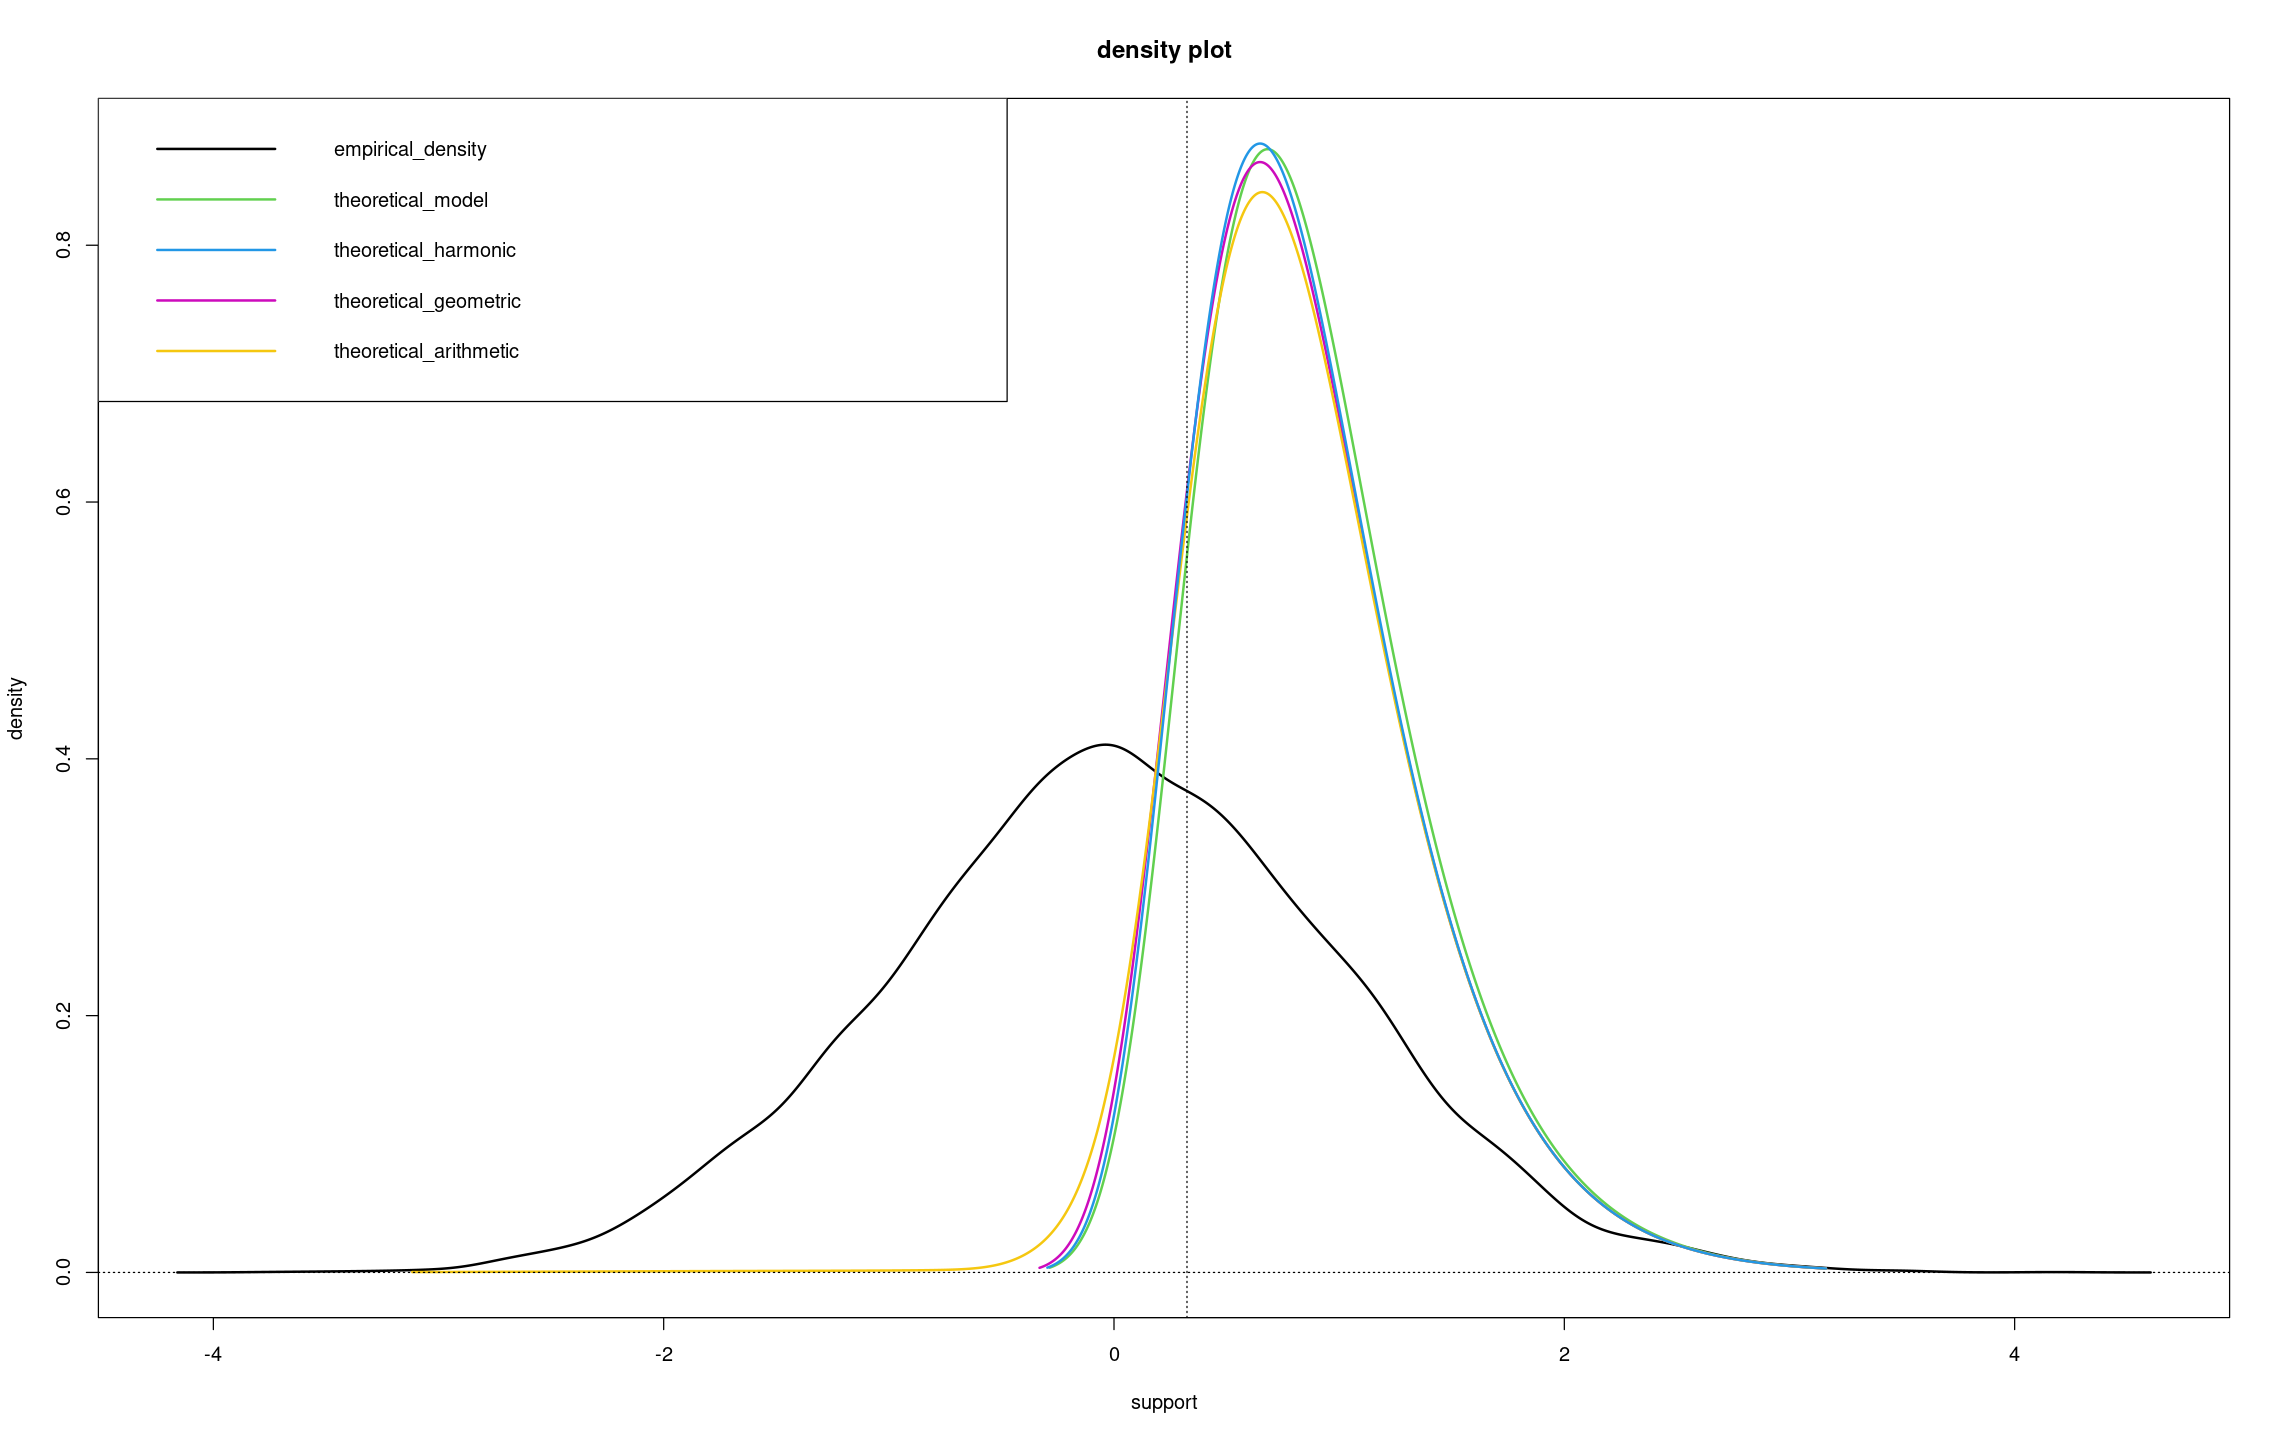

In [44]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

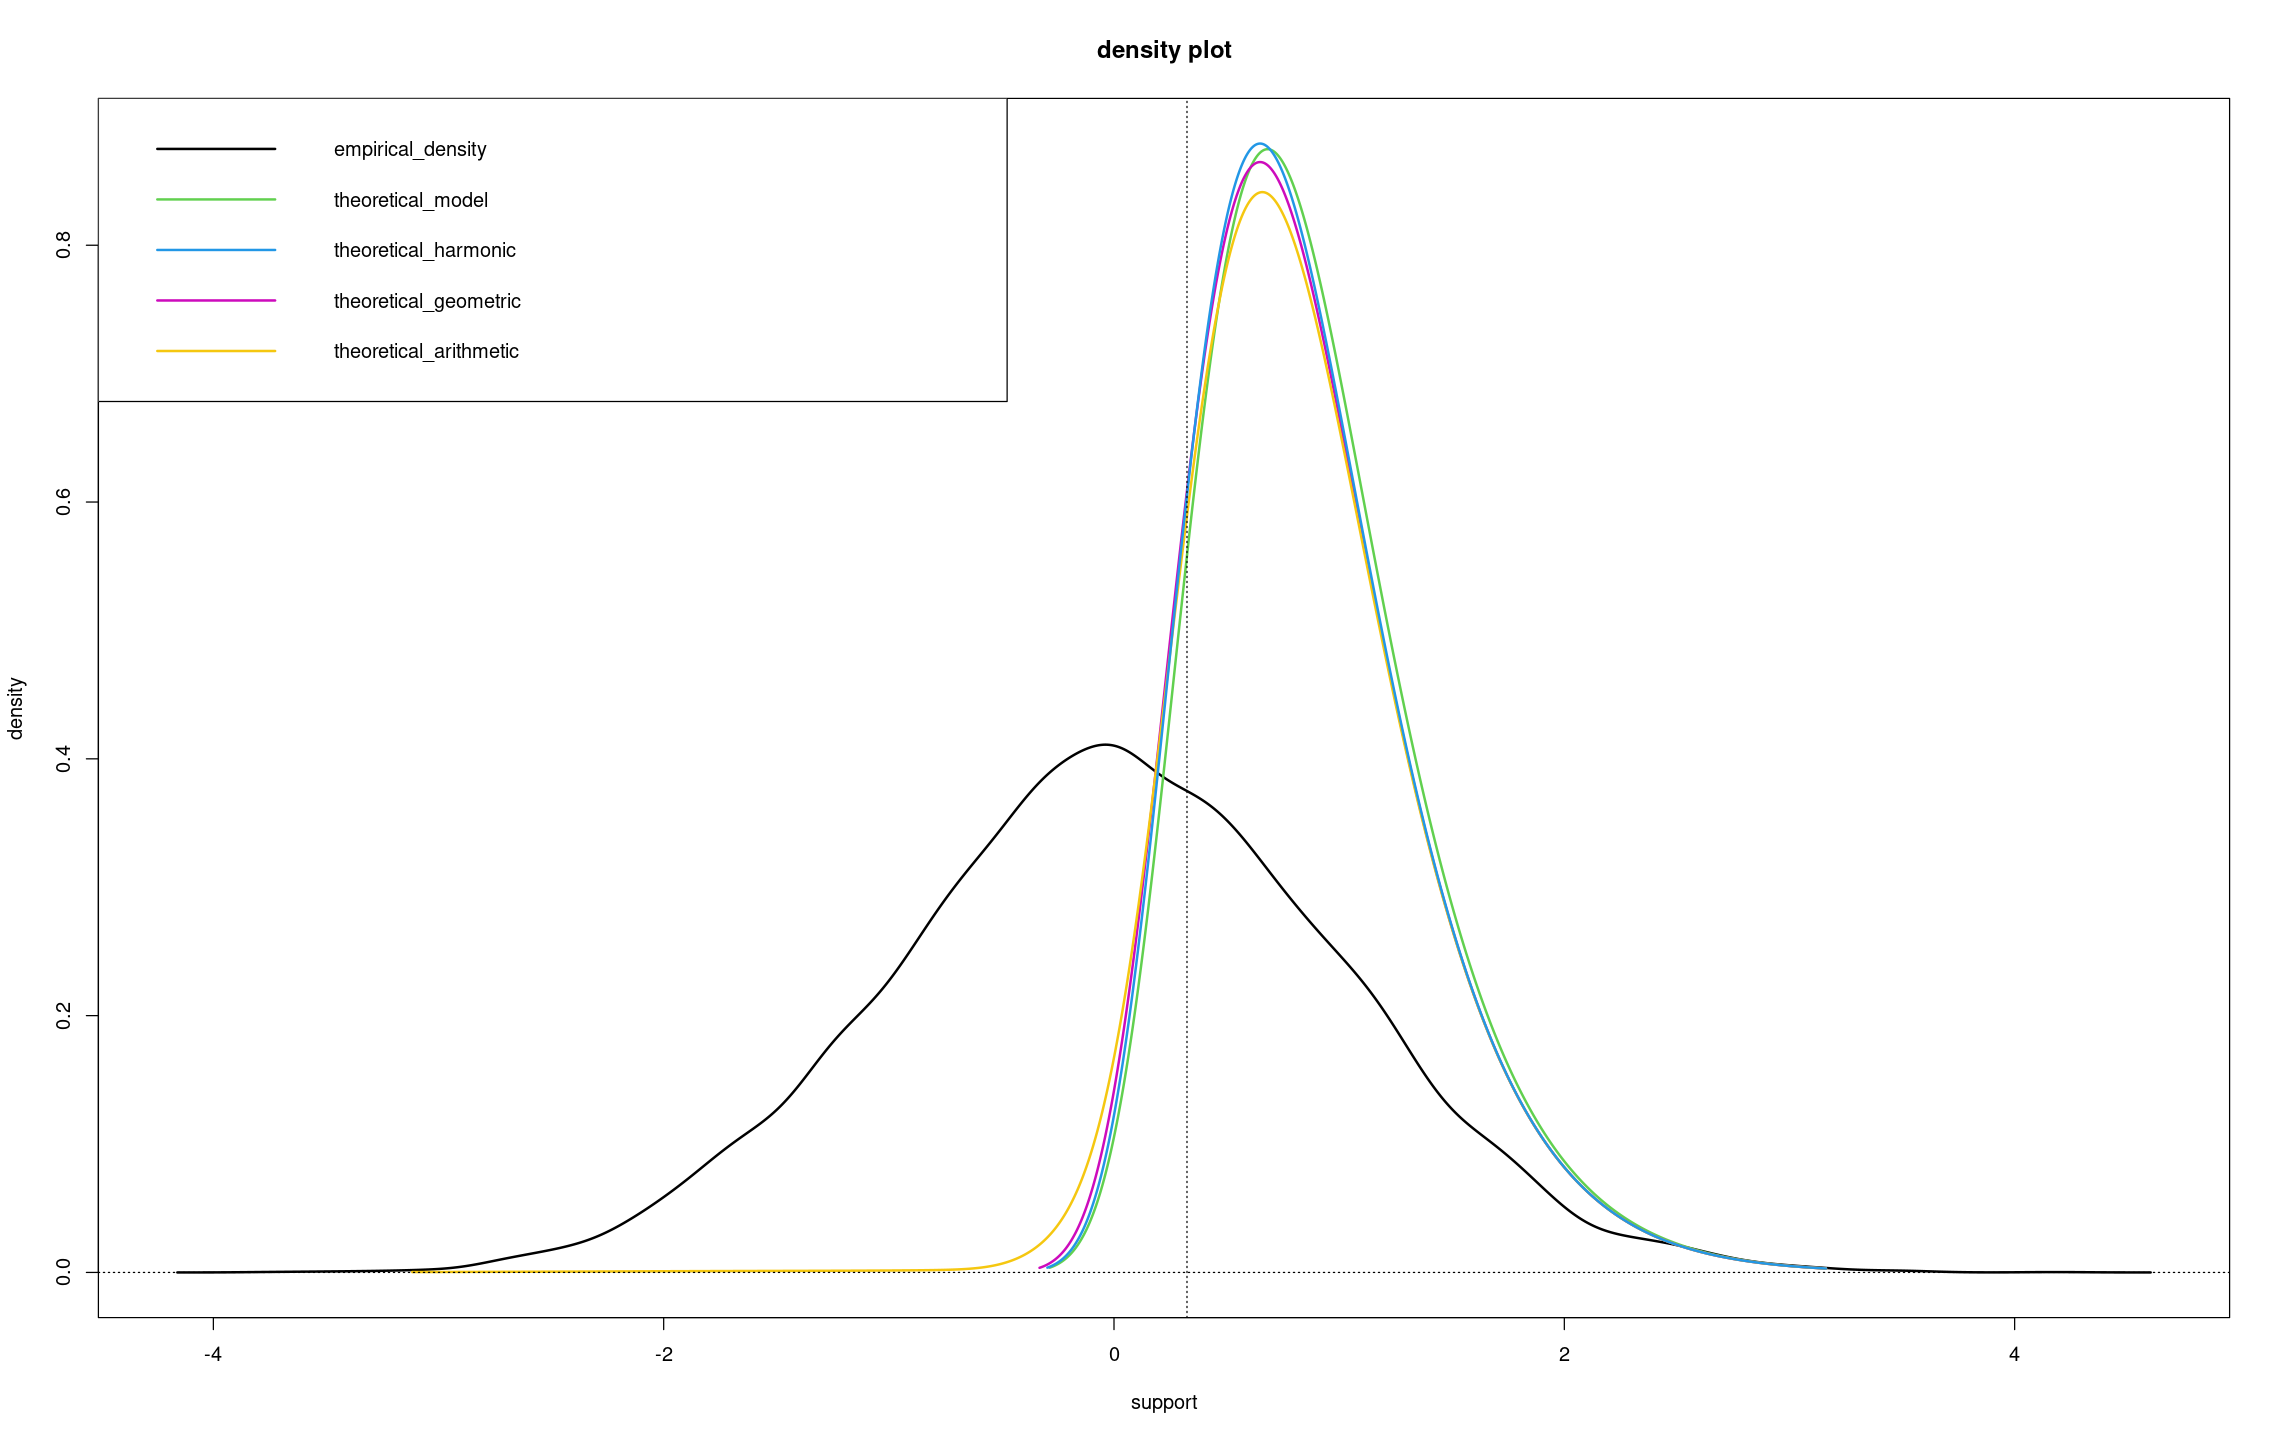

In [45]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

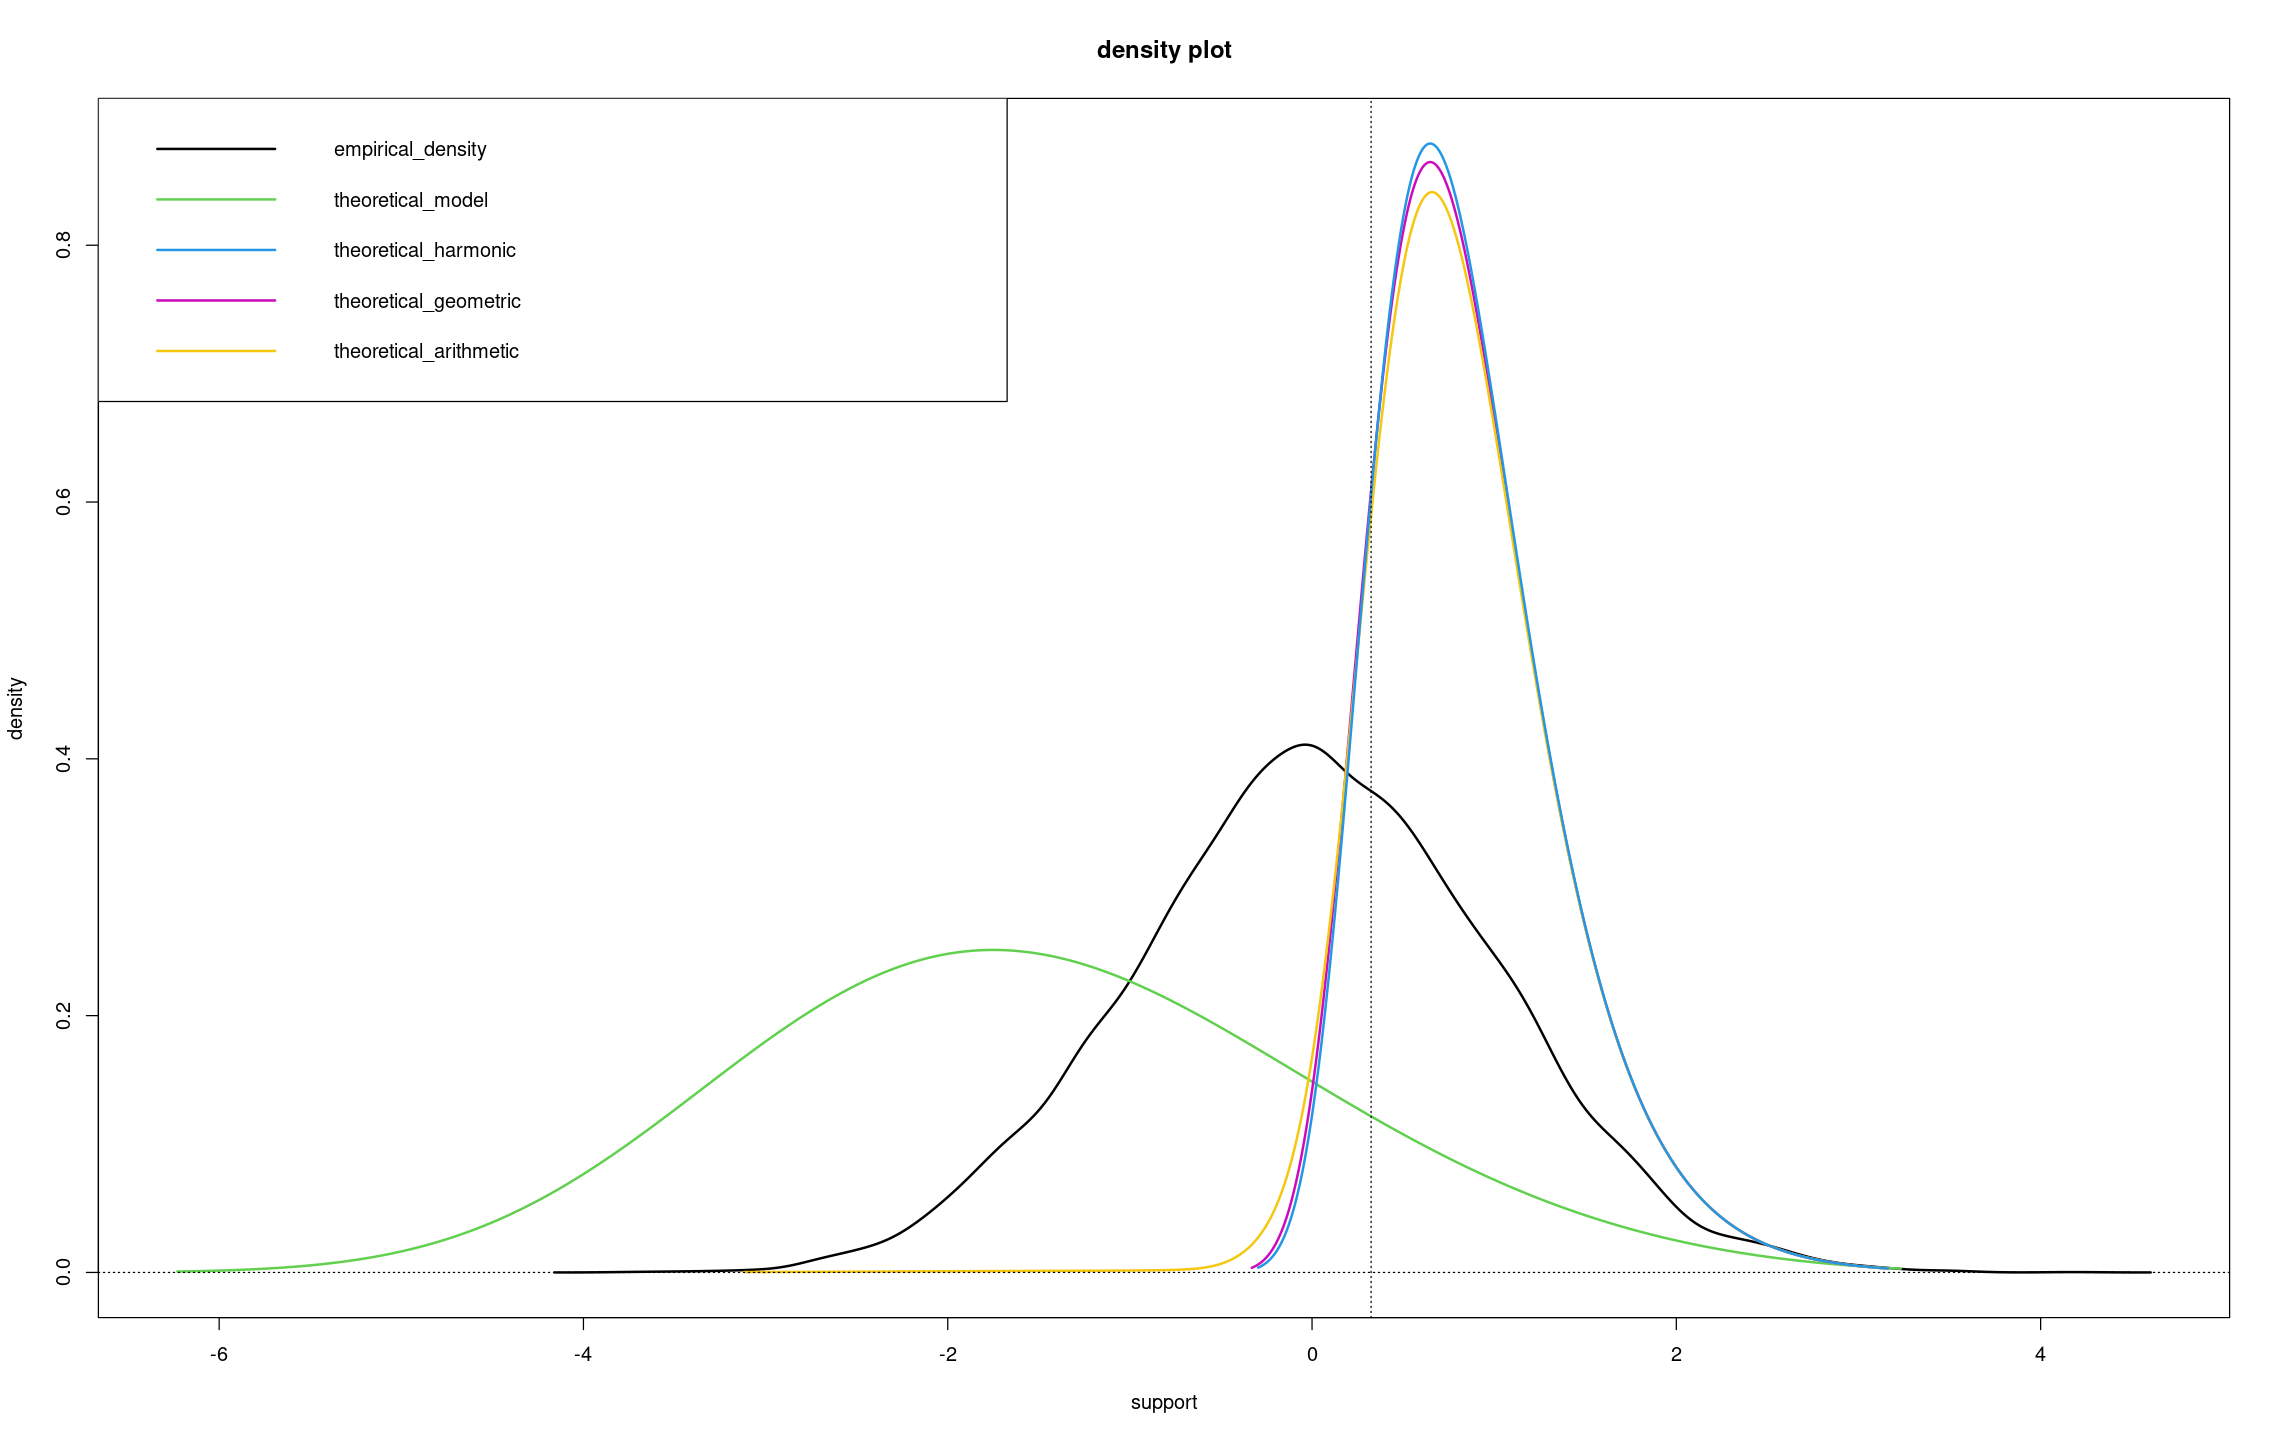

In [46]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topleft")

# Quantiles

In [47]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [48]:
true_quantile <- qnorm(p = 1 - alpha)

print(true_quantile)

[1] 5.612001243


In [49]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
      lower_bound    estimate  upper_bound
42   1.9287984654 6.180680289 10.432562113
135  2.3940008497 4.626250310  6.858499769
182 -1.1300900643 5.853534348 12.837158760
185  2.2199327042 4.560339738  6.900746772
186  0.8132063787 5.129530885  9.445855390
192  1.9577727210 4.581428437  7.205084152
200 -2.9238802724 6.092533820 15.108947912

$gev_mixture_model_quantile
[1] 5.910257814

$smalest_lower_ci_bound
[1] -2.923880272

$largest_upper_ci_bound
[1] 15.10894791

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 12.01233651 18.08324771 24.15415892

$quantile_gev_sup
    lower_bound      estimate   upper_bound
1 -0.5272798327 -0.2516008978 0.02407803718

In [50]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
      lower_bound    estimate  upper_bound
42   1.9287984654 6.180680289 10.432562113
135  2.3940008497 4.626250310  6.858499769
182 -1.1300900643 5.853534348 12.837158760
185  2.2199327042 4.560339738  6.900746772
186  0.8132063787 5.129530885  9.445855390
192  1.9577727210 4.581428437  7.205084152
200 -2.9238802724 6.092533820 15.108947912

$gev_mixture_model_quantile
[1] 5.910257814

$smalest_lower_ci_bound
[1] -2.923880272

$largest_upper_ci_bound
[1] 15.10894791

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 12.01233651 18.08324771 24.15415892

$quantile_gev_sup
    lower_bound      estimate   upper_bound
1 -0.5272798327 -0.2516008978 0.02407803718

In [51]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
      lower_bound    estimate  upper_bound
42   1.9287984654 6.180680289 10.432562113
135  2.3940008497 4.626250310  6.858499769
182 -1.1300900643 5.853534348 12.837158760
185  2.2199327042 4.560339738  6.900746772
186  0.8132063787 5.129530885  9.445855390
192  1.9577727210 4.581428437  7.205084152
200 -2.9238802724 6.092533820 15.108947912

$gev_mixture_model_quantile
[1] 5.910257814

$smalest_lower_ci_bound
[1] -2.923880272

$largest_upper_ci_bound
[1] 15.10894791

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 12.01233651 18.08324771 24.15415892

$quantile_gev_sup
    lower_bound      estimate   upper_bound
1 -0.5272798327 -0.2516008978 0.02407803718

In [52]:
options(repr.plot.width=23, repr.plot.height=6)

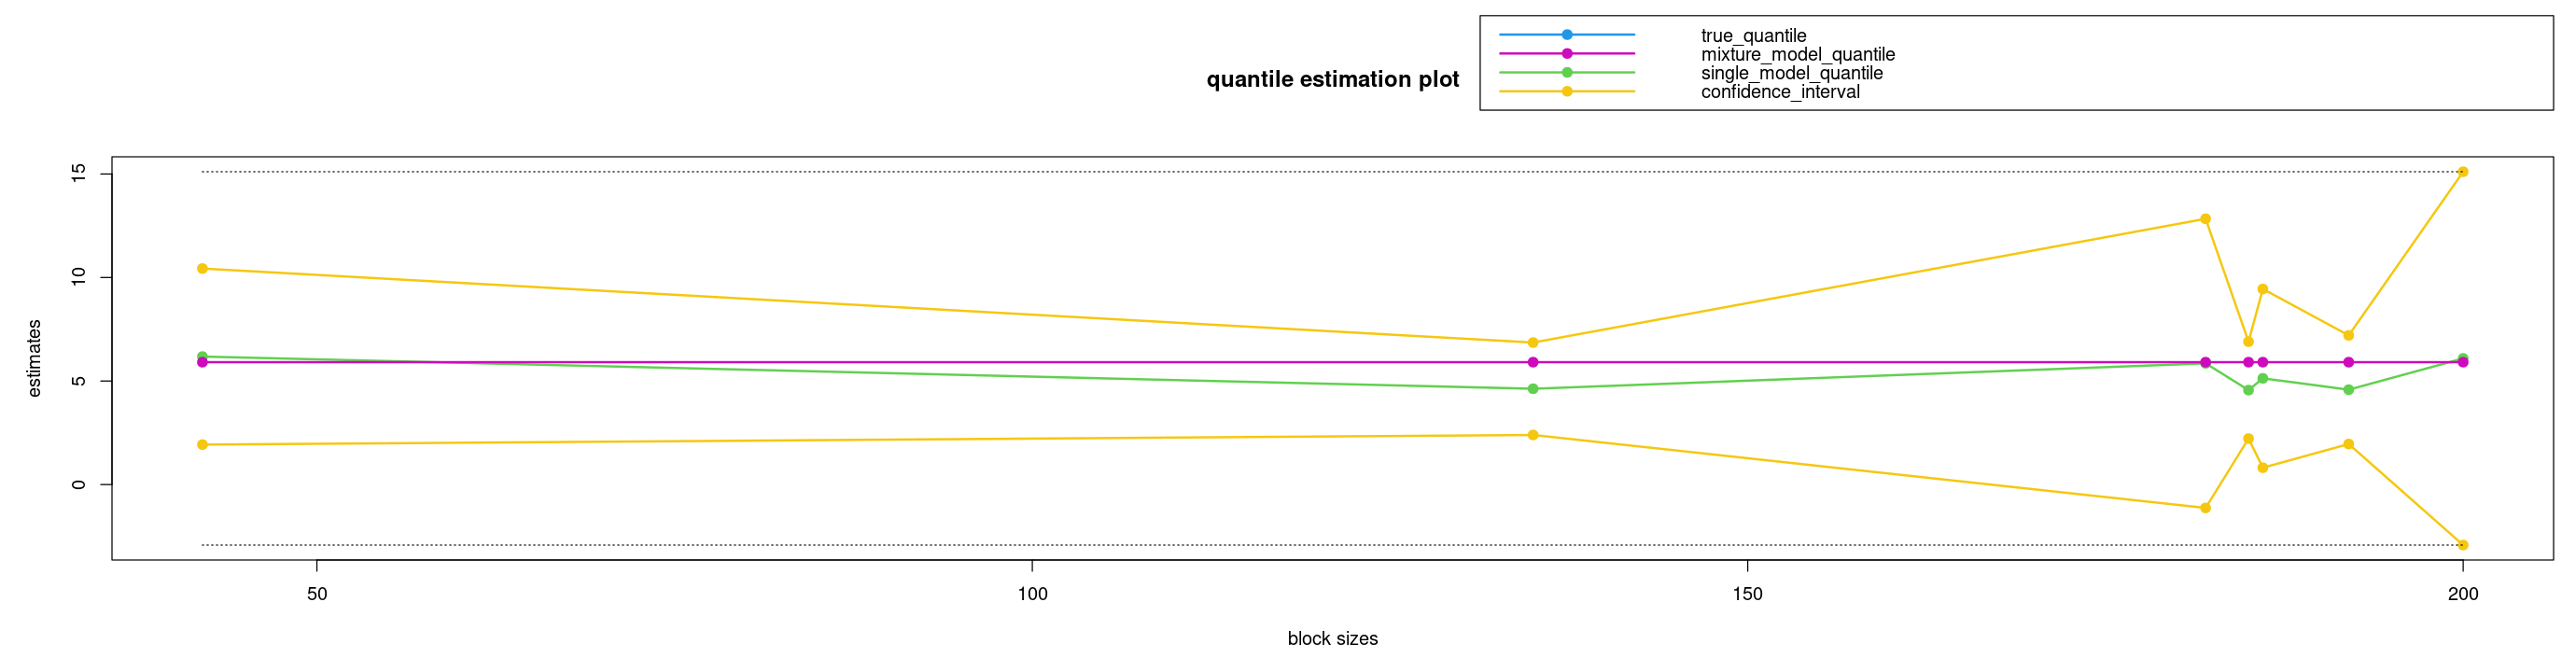

In [53]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

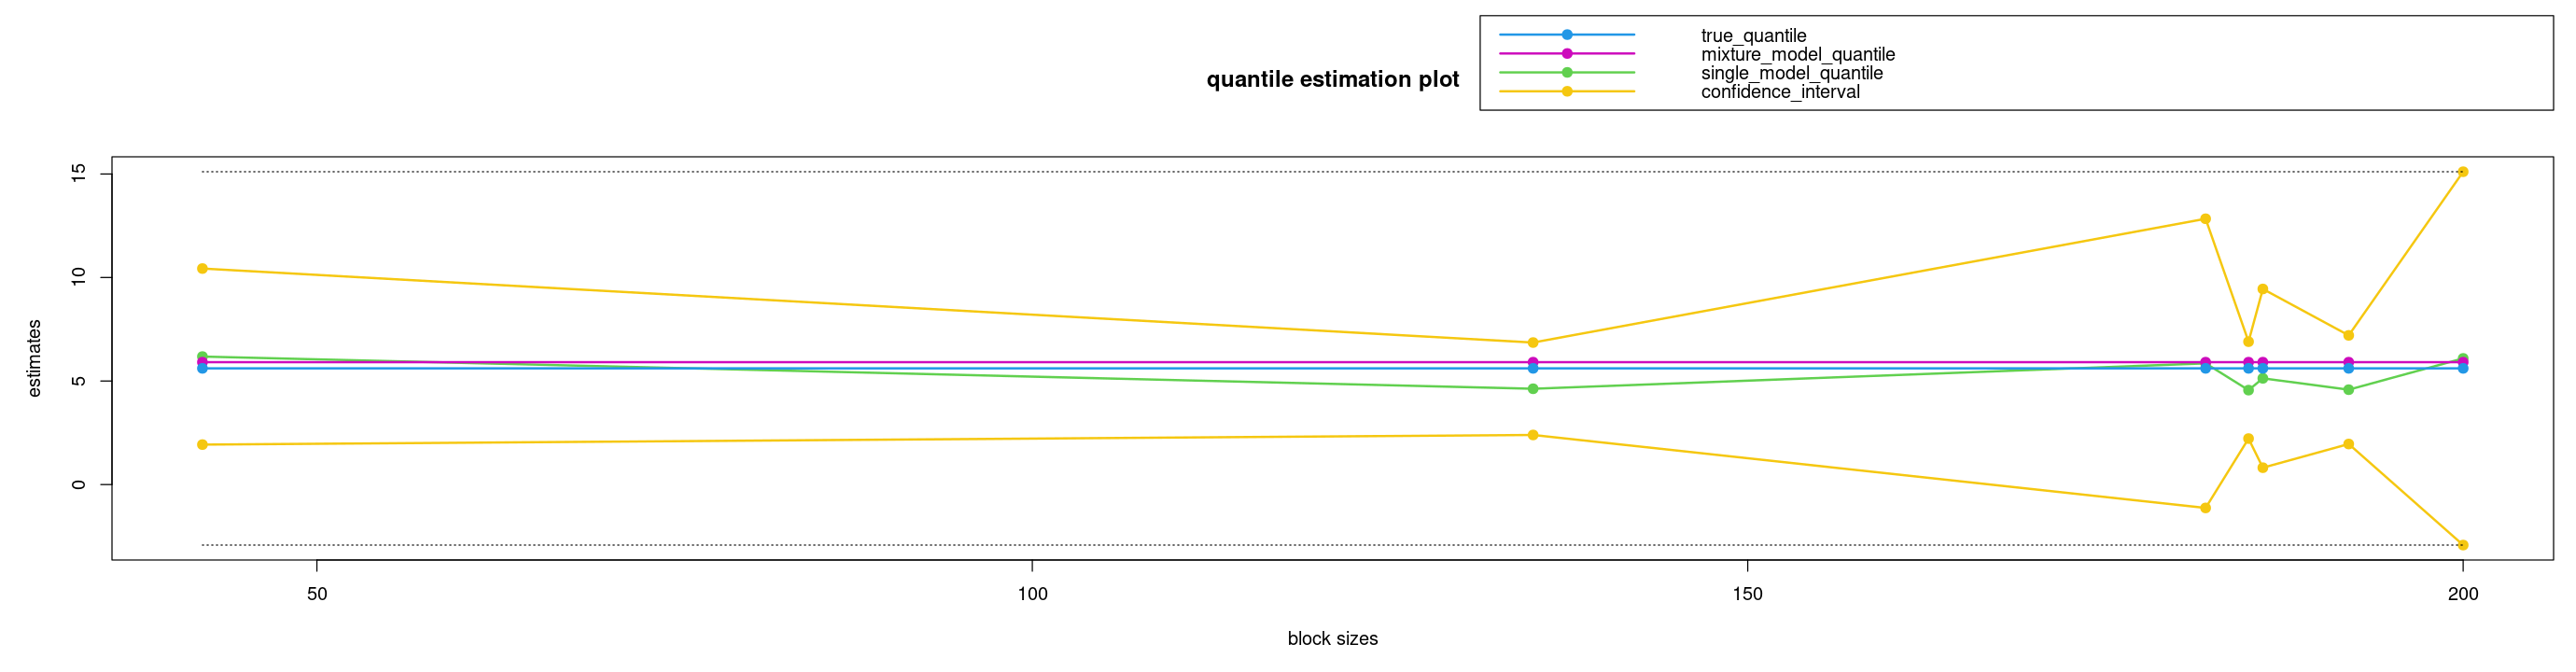

In [54]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
